In [21]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
import mplfinance as mpf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#define the ticker symbol and period for which we want to fetch the stock prices
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-06-05"

#Fetch the stock prices for the specified period
data = yf.download(tickers = ticker, start = start_date, end = end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826843,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200
...,...,...,...,...,...,...
2024-05-29,189.610001,192.250000,189.509995,190.289993,190.289993,53068000
2024-05-30,190.759995,192.179993,190.630005,191.289993,191.289993,49947900
2024-05-31,191.440002,192.570007,189.910004,192.250000,192.250000,75158300


In [3]:
df = pd.DataFrame(data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826843,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200


In [4]:
df.shape

(1113, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1113 entries, 2020-01-02 to 2024-06-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1113 non-null   float64
 1   High       1113 non-null   float64
 2   Low        1113 non-null   float64
 3   Close      1113 non-null   float64
 4   Adj Close  1113 non-null   float64
 5   Volume     1113 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 60.9 KB


In [6]:
df["date"] = pd.to_datetime(df.index)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400,2020-01-02
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251144,146322800,2020-01-03
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826843,118387200,2020-01-06
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484344,108872000,2020-01-07
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650345,132079200,2020-01-08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1113 entries, 2020-01-02 to 2024-06-04
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1113 non-null   float64       
 1   High       1113 non-null   float64       
 2   Low        1113 non-null   float64       
 3   Close      1113 non-null   float64       
 4   Adj Close  1113 non-null   float64       
 5   Volume     1113 non-null   int64         
 6   date       1113 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.6 KB


In [9]:
#create the candlestick chart
fig = go.Figure(data = [go.Candlestick(x = df["date"],
                                       open = df["Open"],
                                       high = df["High"],
                                       low = df["Low"],
                                       close = df["Close"])])

#customize the chart layout
fig.update_layout(
    title = "Stock Price Chart AAPL",
    yaxis_title = "Price ($)",
    xaxis_rangeslider_visible = False)

#Display the chart
fig.show()

In [10]:
df.drop(["date", "Volume"], axis=1, inplace=True)

In [11]:
df.reset_index(drop=True, inplace=True)

<Axes: >

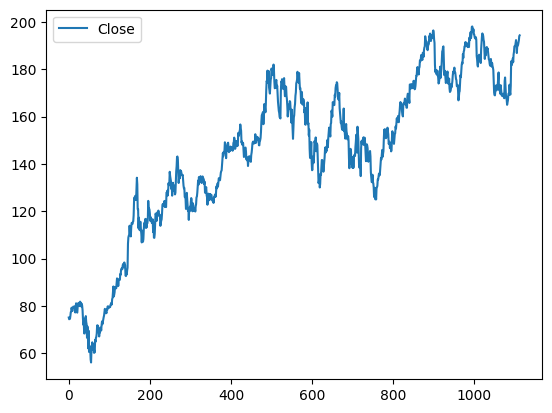

In [12]:
df.plot.line(y = "Close", use_index = True)

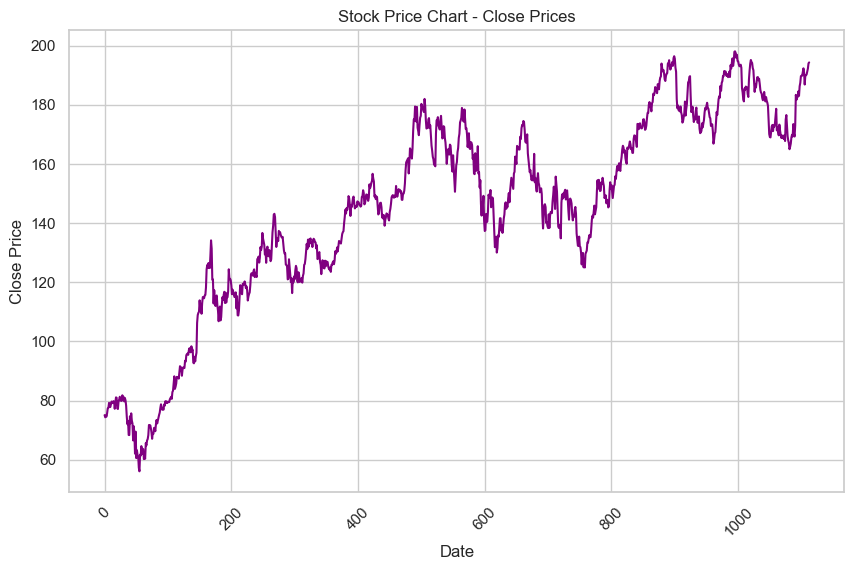

In [15]:
# Configurar el estilo de Seaborn
sns.set(style='whitegrid')

# Crear el gráfico de línea con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=df.index, y="Close", color = "purple")

# Personalizar el gráfico
plt.title("Stock Price Chart - Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.show()

In [17]:
X = df[["Open", "Close", "High", "Low", "Adj Close"]]
X

,Open,Close,High,Low,Adj Close
0,74.059998,75.087502,75.150002,73.797501,72.960472
1,74.287498,74.357498,75.144997,74.125000,72.251144
2,73.447502,74.949997,74.989998,73.187500,72.826843
3,74.959999,74.597504,75.224998,74.370003,72.484344
4,74.290001,75.797501,76.110001,74.290001,73.650345
...,...,...,...,...,...
1108,189.610001,190.289993,192.250000,189.509995,190.289993
1109,190.759995,191.289993,192.179993,190.630005,191.289993
1110,191.440002,192.250000,192.570007,189.910004,192.250000
1111,192.899994,194.029999,194.990005,192.520004,194.029999


In [19]:
y = df["Close"]
y

0        75.087502
1        74.357498
2        74.949997
3        74.597504
4        75.797501
           ...    
1108    190.289993
1109    191.289993
1110    192.250000
1111    194.029999
1112    194.350006
Name: Close, Length: 1113, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((890, 5), (223, 5), (890,), (223,))

Model

In [23]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predictions

In [24]:
y_pred = model.predict(X_test)
y_pred

array([193.88250198,  79.63385086, 181.41169922, 150.69659897,
       127.88669815, 183.8433017 , 180.95870148, 130.81529816,
        93.50785164, 187.11600052, 131.99160095,  77.56087418,
       197.78230331, 181.2105986 , 147.94429687, 172.73350113,
       179.72830246,  71.91620041, 134.85149673, 159.44309921,
        84.74119789,  84.69884789, 165.24860397,  61.35692505,
       119.19259949, 159.03490051, 169.6818985 , 164.81739777,
       154.92659927, 172.31479752, 189.79270096, 157.34420151,
       130.105298  , 163.62589447, 173.02400055,  75.32389946,
       122.62640099, 167.55240417, 150.05210037, 145.8717012 ,
       130.35749878, 134.43759735, 189.84900009, 182.89150101,
       138.34720093, 133.61260162, 165.25640411, 168.48590134,
        79.78547699, 177.27610092, 119.2414003 , 174.57930084,
       142.87059967, 169.11010376,  62.54019958, 146.36910233,
       174.76390152,  71.36042503, 149.31599686, 125.99337524,
       142.39709763, 171.24550262, 186.32649643, 168.30

Evaluate the model

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.3083980672517677

NEW PREDICTION

In [29]:
new_data = np.array([[173.85006, 174.58996, 172.16998, 173.750000, 173.750000]])
new_data

array([[173.85006, 174.58996, 172.16998, 173.75   , 173.75   ]])

In [31]:
#make a prediction using trained model
predicted_price = model.predict(new_data)
print(predicted_price)

[174.54790146]


C:\Users\bigsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [32]:
data_today = np.array([[194.639999, 195.320007, 193.029999, 194.350006, 194.350006]])
data_today

array([[194.639999, 195.320007, 193.029999, 194.350006, 194.350006]])

In [34]:
prediction_today = model.predict(data_today)
print("Predicted stock price:", prediction_today[0])

Predicted stock price: 195.08749771118164


C:\Users\bigsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

